In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib

In [33]:
import os
print(os.getcwd())

/Users/saniyanaaz/Desktop/customer-churn-ml/notebook


In [34]:
os.listdir()

['eda.ipynb', 'churn_analysis.ipynb']

In [35]:
df = pd.read_csv("../data/telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.drop(columns=["customerID"], inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


/var/folders/hk/_pflcjlx5ssdqnvrsnnnk4qc0000gn/T/ipykernel_20128/2079071576.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [37]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

In [38]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [39]:
print(df["Churn"].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In [41]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, lr_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

In [ ]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, rf_pred))


Random Forest
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, xgb_pred))


XGBoost
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest achieved the highest recall for churn class, making it more suitable for minimizing false negatives in customer retention strategy.

In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")


Logistic Regression Accuracy: 0.7313
Random Forest Accuracy: 0.7861
XGBoost Accuracy: 0.7633


/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/saniyanaaz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
importances = rf.feature_importances_
features = df.drop("Churn", axis=1).columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))


                           Feature  Importance
3                     TotalCharges    0.176227
1                           tenure    0.168168
2                   MonthlyCharges    0.152314
25               Contract_Two year    0.060177
10     InternetService_Fiber optic    0.045304
28  PaymentMethod_Electronic check    0.033340
24               Contract_One year    0.030120
13              OnlineSecurity_Yes    0.025667
4                      gender_Male    0.025055
19                 TechSupport_Yes    0.024290


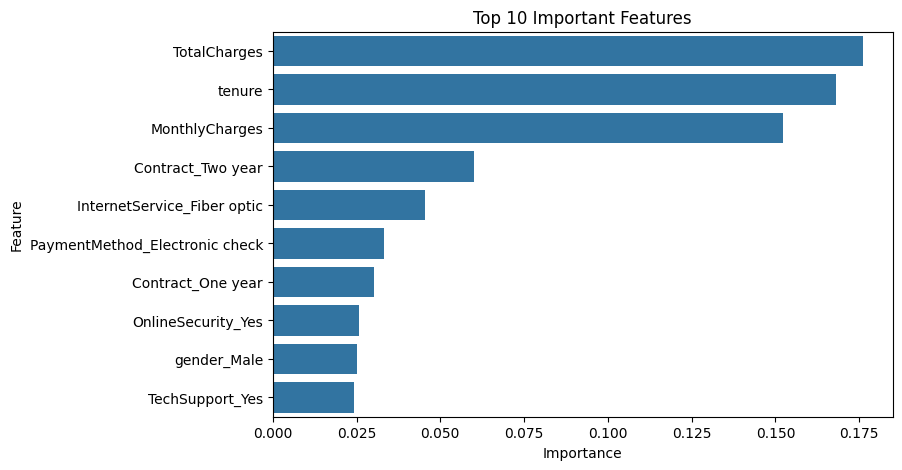

In [ ]:
importance_df = importance_df.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
joblib.dump(rf, "../model.pkl")
joblib.dump(scaler, "../scaler.pkl")


['../scaler.pkl']

In [ ]:
joblib.dump(X.columns.tolist(), "../features.pkl")

['../features.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


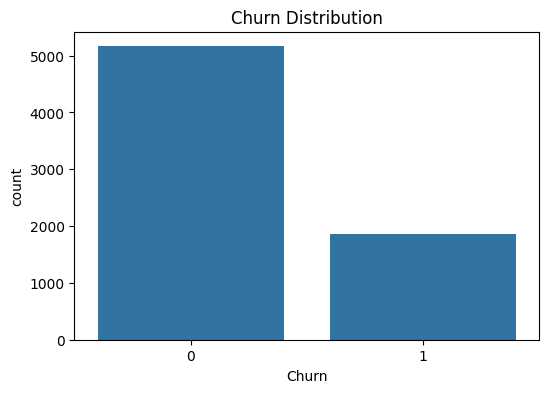

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

print(df['Churn'].value_counts(normalize=True) * 100)

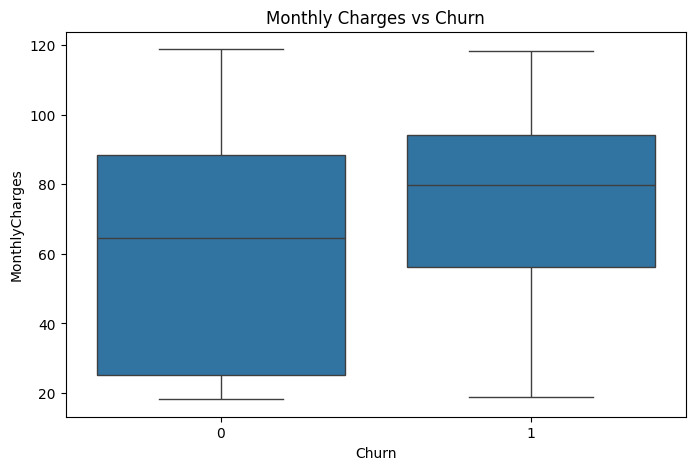

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

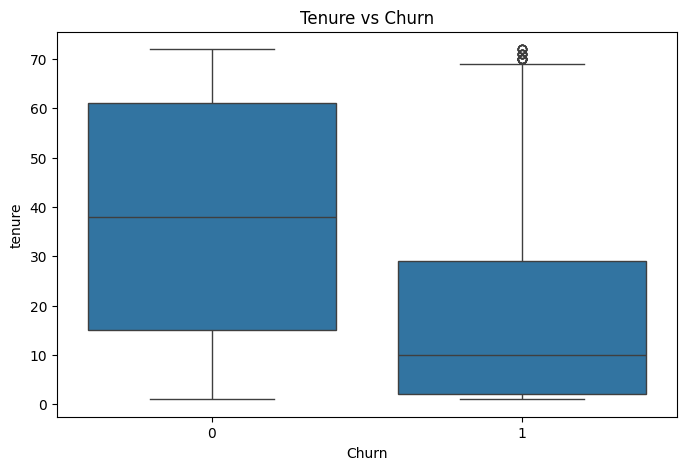

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

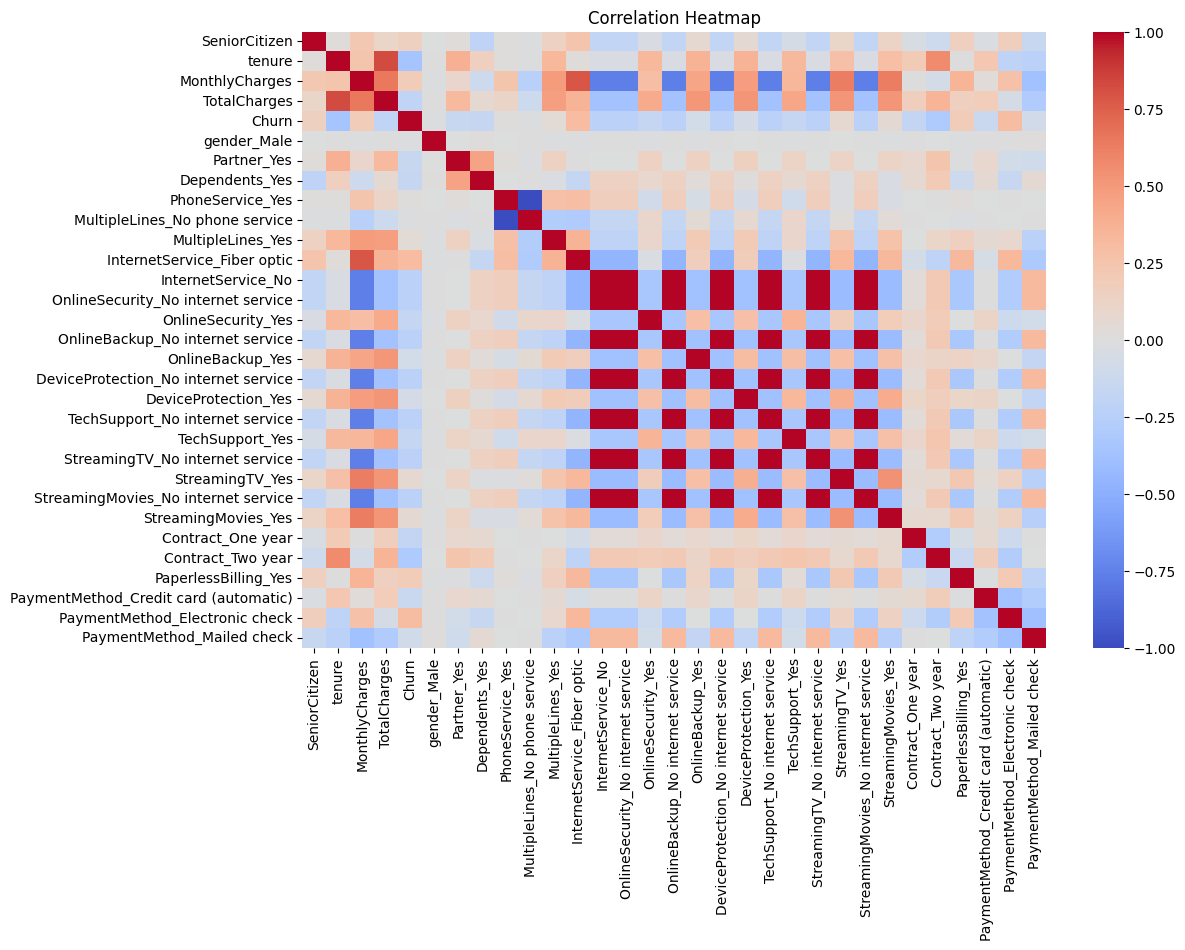

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()